In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import ot
import ot.plot
from sparse_ot.utils import get_G, get_dist, seed, get_topk_plan, postprocess_gamma
from sparse_ot.sparse_repr import get_gamma as get_gamma

In [2]:
from sklearn import datasets

device = torch.device("cpu")

m = 35
n_samples=m
x, _ = datasets.make_circles(n_samples=m, factor=0.4, noise=0.03, random_state=0)

n = 25
n_samples=n
y, _ = datasets.make_circles(n_samples=n, factor=0.6, noise=0.01, random_state=0)
y[:, 0] += 25

a = ot.unif(x.shape[0])
b = ot.unif(y.shape[0])

a_t = torch.from_numpy(a).to(device)
b_t = torch.from_numpy(b).to(device)

x_t = torch.from_numpy(x).to(device)
y_t = torch.from_numpy(y).to(device)
C_t = get_dist(x_t, y_t)
C_t = C_t/C_t.max()
C = C_t.to("cpu").numpy()

with open(f"logs/Corig_{m}_{n}.npy", "wb") as fp:
    np.save(fp, C)

def show(pi, x, y, save_as=None):
    pi = pi/np.max(pi)
    
    plt.rcParams["figure.figsize"] = (8,3)
    ot.plot.plot2D_samples_mat(x, y, pi, color=[.5, .5, 1])
    plt.plot(x[:, 0], x[:, 1], '+b', label='Source samples')
    plt.plot(y[:, 0], y[:, 1], 'xr', label='Target samples')
    plt.legend(loc="upper left")
    if save_as is not None:
        plt.savefig(save_as, bbox_inches = 'tight', pad_inches = 0.25)
    plt.show()
    plt.close()
    print("No. of non-zeros = {}".format((np.where(pi)[0]).shape[0]))

rbf -1 10 tensor(3.7460e+08, dtype=torch.float64) tensor(1524011.8394, dtype=torch.float64)


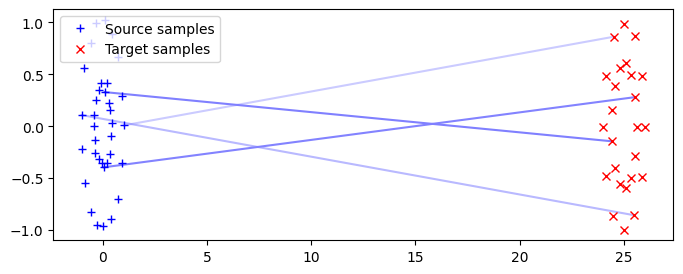

No. of non-zeros = 4
imq 1 10 tensor(14242460.9710, dtype=torch.float64) tensor(91617.1937, dtype=torch.float64)


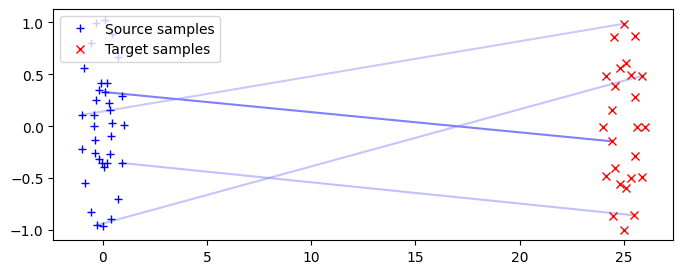

No. of non-zeros = 4
rbf 100 100 tensor(3.4801e+11, dtype=torch.float64) tensor(2.4835e+11, dtype=torch.float64)


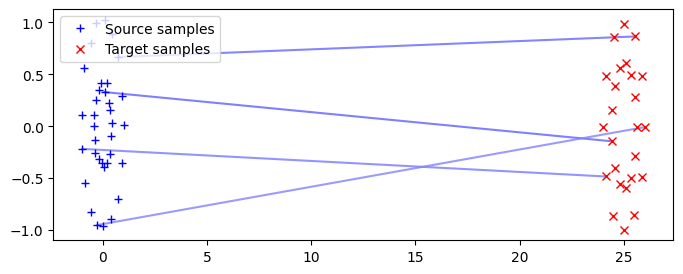

No. of non-zeros = 4
rbf 1 10 tensor(1.2353e+11, dtype=torch.float64) tensor(78692923.4633, dtype=torch.float64)


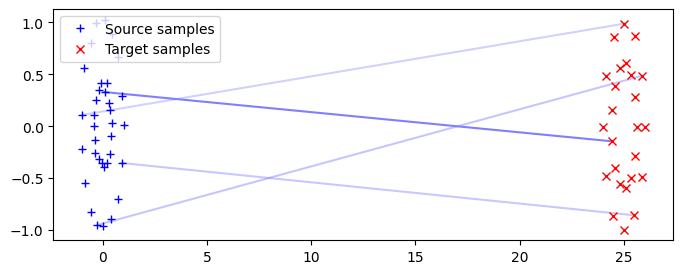

No. of non-zeros = 4


In [3]:
max_itr=100
K=4

ktype = "rbf"
khp = -1
lda = 10

G1 = get_G(ktype=ktype, khp=khp, x=x_t, y=x_t)
G2 = get_G(ktype=ktype, khp=khp, x=y_t, y=y_t)

gamma_sot_init, S_i, S_j = get_gamma(C_t, G1, G2, a_t, b_t, max_itr, K, lda)
gamma_sot = postprocess_gamma(gamma_sot_init, S_i, S_j, m, n)
if gamma_sot.any():
    print(ktype, khp, lda, torch.linalg.cond(G1), torch.linalg.cond(G2))
    show(gamma_sot.cpu().numpy(), x, y, f"logs/prp_{ktype}_{khp}_{lda}.jpg")

ktype = "imq"
khp = 1
lda = 10

G1 = get_G(ktype=ktype, khp=khp, x=x_t, y=x_t)
G2 = get_G(ktype=ktype, khp=khp, x=y_t, y=y_t)

gamma_sot_init, S_i, S_j = get_gamma(C_t, G1, G2, a_t, b_t, max_itr, K, lda)
gamma_sot = postprocess_gamma(gamma_sot_init, S_i, S_j, m, n)
if gamma_sot.any():
    print(ktype, khp, lda, torch.linalg.cond(G1), torch.linalg.cond(G2))
    show(gamma_sot.cpu().numpy(), x, y, f"logs/prp_{ktype}_{khp}_{lda}.jpg")


ktype = "rbf"
khp = 100
lda = 100

G1 = get_G(ktype=ktype, khp=khp, x=x_t, y=x_t)
G2 = get_G(ktype=ktype, khp=khp, x=y_t, y=y_t)

gamma_sot_init, S_i, S_j = get_gamma(C_t, G1, G2, a_t, b_t, max_itr, K, lda)
gamma_sot = postprocess_gamma(gamma_sot_init, S_i, S_j, m, n)
if gamma_sot.any():
    print(ktype, khp, lda, torch.linalg.cond(G1), torch.linalg.cond(G2))
    show(gamma_sot.cpu().numpy(), x, y, f"logs/prp_{ktype}_{khp}_{lda}.jpg")


ktype = "rbf"
khp = 1
lda = 10

G1 = get_G(ktype=ktype, khp=khp, x=x_t, y=x_t)
G2 = get_G(ktype=ktype, khp=khp, x=y_t, y=y_t)

gamma_sot_init, S_i, S_j = get_gamma(C_t, G1, G2, a_t, b_t, max_itr, K, lda)
gamma_sot = postprocess_gamma(gamma_sot_init, S_i, S_j, m, n)
if gamma_sot.any():
    print(ktype, khp, lda, torch.linalg.cond(G1), torch.linalg.cond(G2))
    show(gamma_sot.cpu().numpy(), x, y, f"logs/prp_{ktype}_{khp}_{lda}.jpg")